In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = "../data/fig5a.npz"
subtitles = ["rprob = 0.1", "rprob = 0.01", "rprob = 0.001"]
xlabel = "Sub-Sequence Spread sp"
ylabel = "Average Top-5 Loss"
colors = ['blue', 'red', '#808080', 'black', 'black', 'black']
styles = ['solid', 'solid', 'solid', 'solid', 'dashed', 'dotted']
labels = ['DQN', 'MDP', 'Baseline', 'Lower Bound', 'Weak Classifier', 'Strong Classifier']
markers = ['^', 'o', 'P', False, False, False]
markersize = 15

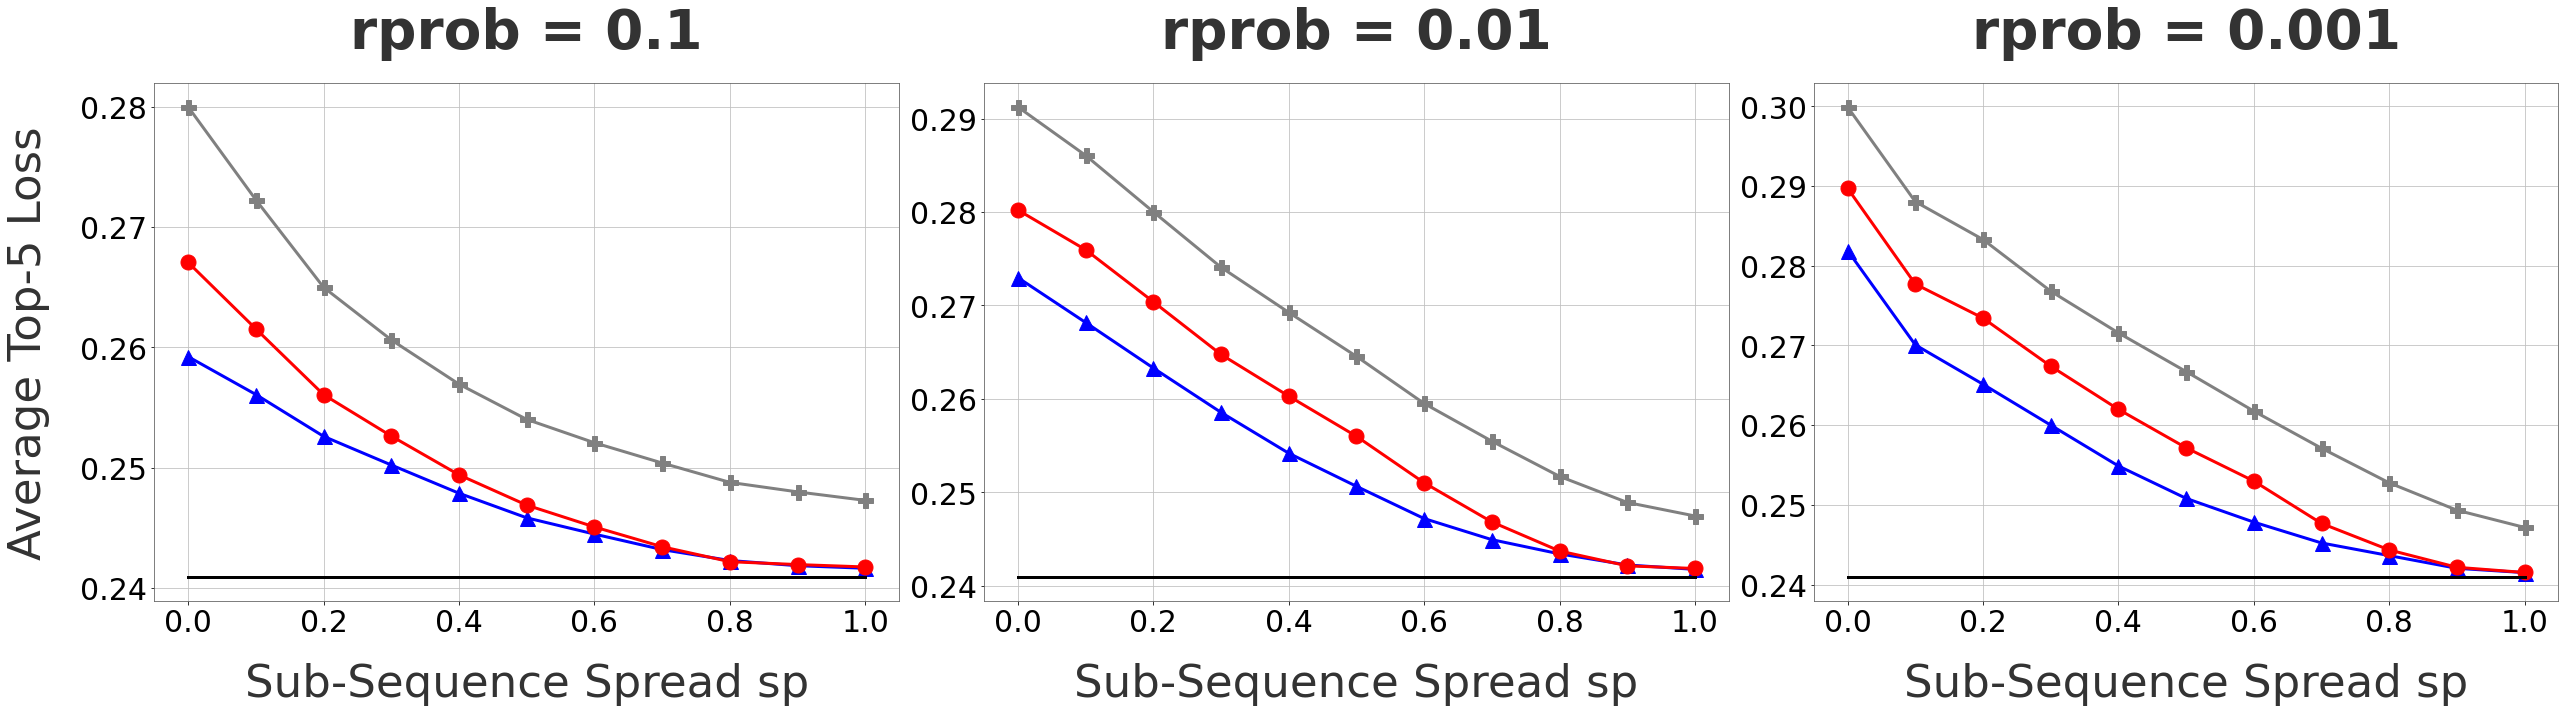

In [3]:
# Create the plot
plt.rc("font", family="DejaVu Sans")
plt.rcParams['figure.figsize'] = (36, 10)
fig, _ = plt.subplots()
ax0, ax1, ax2 = plt.subplot(1,3,1), plt.subplot(1,3,2), plt.subplot(1,3,3)
axes = [ax0, ax1, ax2]

# Configure the subplot setting
for ax, subtitle in zip(axes, subtitles):
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.yaxis.grid(True, color='#C0C0C0')
    ax.xaxis.grid(True, color='#C0C0C0')
    ax.spines['top'].set_color('#606060')
    ax.spines['bottom'].set_color('#606060')
    ax.spines['left'].set_color('#606060')
    ax.spines['right'].set_color('#606060')
    ax.set_title(subtitle, pad=35, color='#333333', size=55, weight='bold')
    ax.set_xlabel(xlabel, labelpad=25, color='#333333', size=45)
axes[0].set_ylabel(ylabel, labelpad=30, color='#333333', size=45)

# Retrieve data from npz file
npz_data = np.load(data_path)
lb = npz_data['lower_bound']
xdata, ydata = np.arange(0, 1.1, 0.1), list()
for base, mdp, dqn in zip(npz_data['baseline'], npz_data['mdp'], npz_data['dqn']):
    pdata = np.zeros((4, 11))
    pdata[0], pdata[1], pdata[2] = dqn, mdp, base
    pdata[3] = np.ones_like(xdata)*lb
    ydata.append(pdata)

# Plot the simulation data
for i in range(len(axes)):
    lines = list()
    for dat, color, style, marker in zip(ydata[i], colors, styles, markers):
        line, = axes[i].plot(xdata, dat, linewidth=3, color=color, linestyle=style)
        lines.append(line)
        if marker:
            line.set_marker(marker); line.set_markersize(markersize)
plt.tight_layout()
plt.savefig('../pdf/Fig5a_spread.pdf', bbox_inches='tight')
plt.show()